## Changelog

| Date | Change | Description |
|------|--------|-------------|
| 2025-03-21 | Data exploration | Loaded and explored the dataset structure, checked for missing values, and analyzed feature distributions |
| 2025-03-21 | Data preprocessing | Split data into training and testing sets, applied StandardScaler to numerical features and OneHotEncoder to categorical features |
| 2025-03-21 | Model building | Created a neural network with 3 hidden layers (64, 32, 16 neurons) with ReLU activation and dropout layers for regularization |
| 2025-03-21 | Model training and evaluation | Trained model with early stopping and achieved MSE: 6.8446, RMSE: 2.6162, MAE: 1.7909, R²: 0.6662 on test set |
| 2025-03-21 | Model optimization | Created optimized model with deeper architecture (128-64-32-16 neurons), increased dropout (0.3), custom learning rate (0.001), and achieved MSE: 7.1760, RMSE: 2.6788, MAE: 1.9052, R²: 0.6500 on test set |
| 2025-03-21 | Results documentation | Documented all results, visualizations, and conclusions in the Jupyter notebook |


## 1. Import Libraries

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Display versions
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"TensorFlow version: {tf.__version__}")

2025-03-21 15:11:32.445987: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-21 15:11:32.457085: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742569892.469329  109884 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742569892.472241  109884 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1742569892.480103  109884 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

Pandas version: 2.2.2
NumPy version: 2.1.1
TensorFlow version: 2.19.0


## 2. Load and Explore Data

In [4]:
# Load the datasets
# We have two datasets: one for Math course and one for Portuguese language course
math_df = pd.read_csv('student-mat.csv', sep=';')

# Display basic information about the datasets
print("Math dataset shape:", math_df.shape)

# Display first few rows of the Math dataset
math_df.head()

Math dataset shape: (395, 33)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [6]:
# Check for missing values
print("Missing values in Math dataset:")
print(math_df.isnull().sum())

Missing values in Math dataset:
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [7]:
# Get statistical summary of the Math dataset
math_df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


## 3. Data Preprocessing

In [8]:
# For this project, we'll focus on the Math dataset
# We'll use G3 (final grade) as our target variable

# Separate features and target
X = math_df.drop('G3', axis=1)
y = math_df['G3']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"Categorical columns: {categorical_cols}")
print(f"Numerical columns: {numerical_cols}")

Categorical columns: ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
Numerical columns: ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2']


In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (316, 32)
Testing set shape: (79, 32)


In [10]:
# Create preprocessing pipeline
# We'll use one-hot encoding for categorical variables and standard scaling for numerical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Fit the preprocessor on the training data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Get the feature names after one-hot encoding
ohe = preprocessor.named_transformers_['cat']
cat_feature_names = ohe.get_feature_names_out(categorical_cols)
feature_names = numerical_cols + cat_feature_names.tolist()

print(f"Number of features after preprocessing: {X_train_processed.shape[1]}")

Number of features after preprocessing: 58


## 4. Build Neural Network Model

In [11]:
# Define the neural network model
def create_model(input_dim):
    model = Sequential([
        Dense(64, activation='relu', input_dim=input_dim),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(16, activation='relu'),
        Dense(1)  # Output layer for regression (no activation function)
    ])
    
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# Create the model
input_dim = X_train_processed.shape[1]
model = create_model(input_dim)

# Display model summary
model.summary()

/home/jack/College/DataSciML/.venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-03-21 15:12:16.432067: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         3,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,401 (25.00 KB)

 Trainable params: 6,401 (25.00 KB)

 Non-trainable params: 0 (0.00 B)

## 5. Train and Evaluate Model

In [12]:
# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True)

# Train the model
history = model.fit(
    X_train_processed, y_train,
    epochs=100,
    batch_size=16,
    validation_split=0.2,
    callbacks=[early_stopping, model_checkpoint],
    verbose=1
)

Epoch 1/100
 1/16 ━━━━━━━━━━━━━━━━━━━━ 11s 760ms/step - loss: 108.3143 - mae: 9.3038

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 104.2522 - mae: 9.2948 - val_loss: 85.0571 - val_mae: 8.6497
Epoch 2/100
 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 79.1649 - mae: 8.2535

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 66.3548 - mae: 7.4515 - val_loss: 30.8575 - val_mae: 5.0193
Epoch 3/100
 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 37.0482 - mae: 5.6325

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 25.2616 - mae: 4.2628 - val_loss: 13.7658 - val_mae: 2.4978
Epoch 4/100
 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 41.5372 - mae: 4.2546

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 22.7064 - mae: 3.3199 - val_loss: 9.8727 - val_mae: 2.2121
Epoch 5/100
 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 25.7845 - mae: 3.7571

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 14.9857 - mae: 3.0207 - val_loss: 8.6932 - val_mae: 2.2146
Epoch 6/100
 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 17.0598 - mae: 3.3445

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13.5906 - mae: 3.0103 - val_loss: 6.8245 - val_mae: 1.8102
Epoch 7/100
 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 16.3623 - mae: 2.9429

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 11.9818 - mae: 2.6526 - val_loss: 6.2615 - val_mae: 1.7854
Epoch 8/100
 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 18.2536 - mae: 2.9568

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11.5936 - mae: 2.7052 - val_loss: 5.9415 - val_mae: 1.7570
Epoch 9/100
 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 19.0263 - mae: 3.0348

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 11.6153 - mae: 2.6083 - val_loss: 5.8232 - val_mae: 1.7795
Epoch 10/100
 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 11.1968 - mae: 2.5822

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.1755 - mae: 2.3923 - val_loss: 5.1973 - val_mae: 1.5510
Epoch 11/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.7319 - mae: 2.3852 - val_loss: 5.2446 - val_mae: 1.6688
Epoch 12/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.2795 - mae: 2.3917 - val_loss: 5.3373 - val_mae: 1.7337
Epoch 13/100
 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 9.2815 - mae: 2.3594

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.5523 - mae: 2.1860 - val_loss: 5.1159 - val_mae: 1.6634
Epoch 14/100
 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 11.9406 - mae: 2.3670

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.9878 - mae: 2.1781 - val_loss: 4.9501 - val_mae: 1.6453
Epoch 15/100
 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 11.9195 - mae: 2.1176

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.1957 - mae: 2.0029 - val_loss: 4.6459 - val_mae: 1.5982
Epoch 16/100
 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 14.5723 - mae: 3.2440

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.0331 - mae: 2.1973 - val_loss: 4.5390 - val_mae: 1.5675
Epoch 17/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.1619 - mae: 2.0659 - val_loss: 4.8486 - val_mae: 1.7160
Epoch 18/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.1067 - mae: 1.8810 - val_loss: 4.5994 - val_mae: 1.6054
Epoch 19/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.8532 - mae: 1.8715 - val_loss: 4.9063 - val_mae: 1.7322
Epoch 20/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.5853 - mae: 1.9775 - val_loss: 4.6467 - val_mae: 1.6606
Epoch 21/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.2567 - mae: 1.9251 - val_loss: 5.0879 - val_mae: 1.8183
Epoch 22/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.2462 - mae: 1.8411 - val_loss: 5.0756 - val_mae: 1.8172
Epoch 23/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.9324 - mae: 2.0788 - val_loss: 4.6770 - val_mae: 1.6911
Epoch 24/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.9701 - 

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.1946 - mae: 1.9618 - val_loss: 4.0288 - val_mae: 1.4090
Epoch 26/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.4383 - mae: 1.9260 - val_loss: 5.2210 - val_mae: 1.8839
Epoch 27/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.9238 - mae: 1.7066 - val_loss: 4.0946 - val_mae: 1.5033
Epoch 28/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.4517 - mae: 1.7927 - val_loss: 4.6865 - val_mae: 1.7401
Epoch 29/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.5936 - mae: 1.6703 - val_loss: 4.0316 - val_mae: 1.4646
Epoch 30/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.1285 - mae: 1.8085 - val_loss: 5.3793 - val_mae: 1.9422
Epoch 31/100
 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.3039 - mae: 1.8729

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.1997 - mae: 1.6021 - val_loss: 3.9199 - val_mae: 1.4861
Epoch 32/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.7064 - mae: 1.6930 - val_loss: 4.0935 - val_mae: 1.5618
Epoch 33/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.4885 - mae: 1.6190 - val_loss: 4.1989 - val_mae: 1.5824
Epoch 34/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.2988 - mae: 1.6517 - val_loss: 3.9613 - val_mae: 1.5121
Epoch 35/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.7314 - mae: 1.6802 - val_loss: 4.5158 - val_mae: 1.6986
Epoch 36/100
 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.5463 - mae: 1.7931

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.6477 - mae: 1.4735 - val_loss: 3.8649 - val_mae: 1.4669
Epoch 37/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.3295 - mae: 1.5790 - val_loss: 3.9075 - val_mae: 1.5139
Epoch 38/100
 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 5.4712 - mae: 1.6449

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.9022 - mae: 1.4677 - val_loss: 3.7849 - val_mae: 1.4566
Epoch 39/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.9632 - mae: 1.6207 - val_loss: 4.0732 - val_mae: 1.5650
Epoch 40/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.9998 - mae: 1.6182 - val_loss: 4.5995 - val_mae: 1.7617
Epoch 41/100
 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 6.2710 - mae: 2.0312

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.5068 - mae: 1.6525 - val_loss: 3.6258 - val_mae: 1.4316
Epoch 42/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.7913 - mae: 1.5179 - val_loss: 3.8946 - val_mae: 1.5349
Epoch 43/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.0519 - mae: 1.3220 - val_loss: 3.8188 - val_mae: 1.5436
Epoch 44/100
 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2.9318 - mae: 1.3408

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.3906 - mae: 1.4413 - val_loss: 3.4879 - val_mae: 1.4229
Epoch 45/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.8133 - mae: 1.3067 - val_loss: 3.7375 - val_mae: 1.5407
Epoch 46/100
 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2.4507 - mae: 1.3216

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.4509 - mae: 1.4240 - val_loss: 3.3346 - val_mae: 1.3710
Epoch 47/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.0395 - mae: 1.3480 - val_loss: 3.8088 - val_mae: 1.4863
Epoch 48/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.0508 - mae: 1.4424 - val_loss: 3.8257 - val_mae: 1.4878
Epoch 49/100
 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 6.1132 - mae: 1.9777

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.4357 - mae: 1.6007 - val_loss: 3.2662 - val_mae: 1.3538
Epoch 50/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.4563 - mae: 1.4383 - val_loss: 3.8411 - val_mae: 1.5735
Epoch 51/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.4829 - mae: 1.3811 - val_loss: 3.5246 - val_mae: 1.4406
Epoch 52/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.0588 - mae: 1.3101 - val_loss: 3.6618 - val_mae: 1.4735
Epoch 53/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.9375 - mae: 1.3601 - val_loss: 4.1926 - val_mae: 1.6586
Epoch 54/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.0624 - mae: 1.3493 - val_loss: 3.5118 - val_mae: 1.4521
Epoch 55/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.5231 - mae: 1.4611 - val_loss: 4.3260 - val_mae: 1.7197
Epoch 56/100
 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 3.9584 - mae: 1.4470

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.1660 - mae: 1.3500 - val_loss: 3.2007 - val_mae: 1.3380
Epoch 57/100
Epoch 57/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.8835 - mae: 1.2928 - val_loss: 3.2778 - val_mae: 1.3976
Epoch 58/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.7526 - mae: 1.4735 - val_loss: 3.7459 - val_mae: 1.5675
Epoch 59/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.4684 - mae: 1.2638 - val_loss: 3.2746 - val_mae: 1.3895
Epoch 60/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.1672 - mae: 1.1014 - val_loss: 3.2949 - val_mae: 1.3913
Epoch 61/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.8341 - mae: 1.2948 - val_loss: 3.3306 - val_mae: 1.4107
Epoch 62/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.6118 - mae: 1.2112 - val_loss: 3.5301 - val_mae: 1.4648
Epoch 63/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.3973 - mae: 1.1526 - val_loss: 4.0335 - val_mae: 1.6313
Epoch 64/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - lo

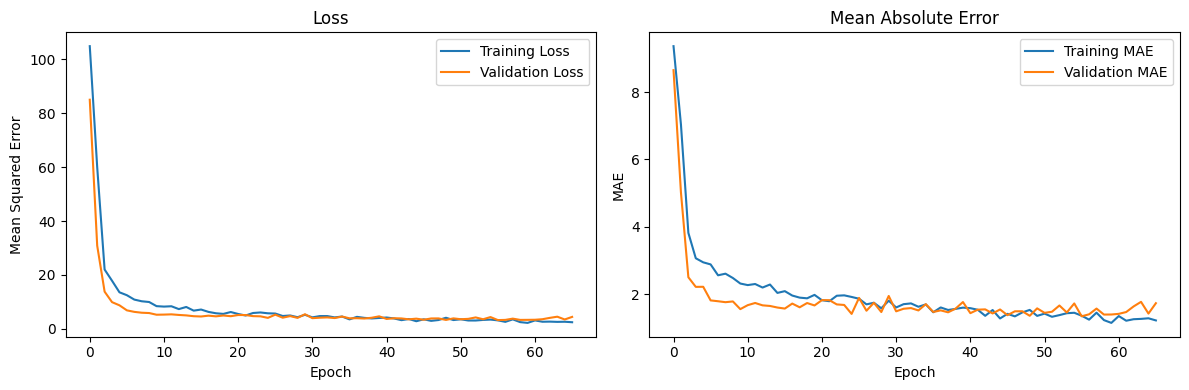

In [13]:
# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Mean Absolute Error')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

In [14]:
# Evaluate the model on the test set
y_pred = model.predict(X_test_processed).flatten()

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R² Score: {r2:.4f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Mean Squared Error: 6.8680
Root Mean Squared Error: 2.6207
Mean Absolute Error: 1.9307
R² Score: 0.6651


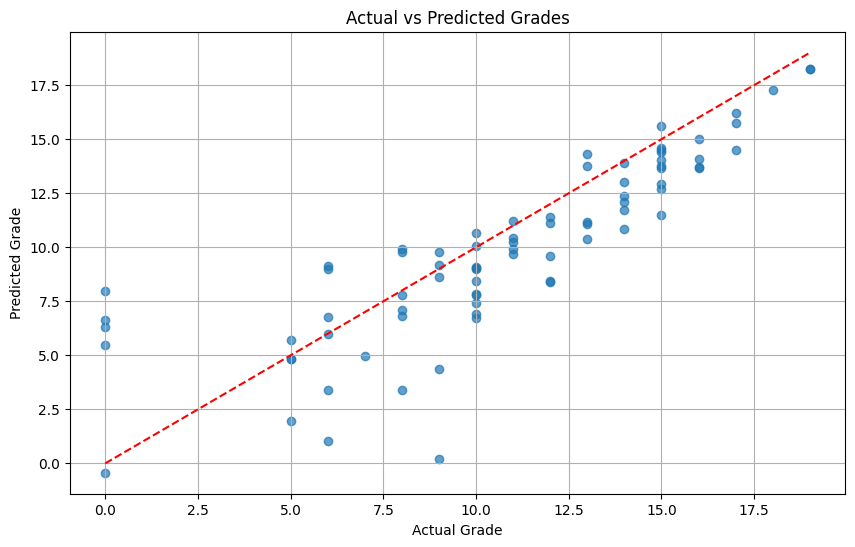

In [15]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Grade')
plt.ylabel('Predicted Grade')
plt.title('Actual vs Predicted Grades')
plt.grid(True)
plt.show()

## 6. Model Optimization

In [16]:
# Define a function to create an improved model
def create_improved_model(input_dim):
    model = Sequential([
        Dense(128, activation='relu', input_dim=input_dim),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(16, activation='relu'),
        Dense(1)
    ])
    
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='mse',
                  metrics=['mae'])
    return model

# Create the improved model
improved_model = create_improved_model(input_dim)
improved_model.summary()

/home/jack/College/DataSciML/.venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 128)            │         7,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,433 (72.00 KB)

 Trainable params: 18,433 (72.00 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# Train the improved model
improved_history = improved_model.fit(
    X_train_processed, y_train,
    epochs=150,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping, ModelCheckpoint('improved_model.h5', save_best_only=True)],
    verbose=1
)

Epoch 1/150
1/8 ━━━━━━━━━━━━━━━━━━━━ 4s 679ms/step - loss: 114.9232 - mae: 9.9031

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 118.1875 - mae: 9.9271 - val_loss: 111.8139 - val_mae: 9.8445
Epoch 2/150
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 103.3443 - mae: 9.4380

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 102.6027 - mae: 9.2946 - val_loss: 91.0238 - val_mae: 8.8857
Epoch 3/150
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 80.5630 - mae: 8.2744

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 79.2787 - mae: 8.1878 - val_loss: 55.4584 - val_mae: 6.8952
Epoch 4/150
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 46.0162 - mae: 6.2916

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 43.4269 - mae: 5.9556 - val_loss: 16.0424 - val_mae: 3.2737
Epoch 5/150
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 18.3160 - mae: 3.2632

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 26.4978 - mae: 3.9258 - val_loss: 12.5187 - val_mae: 2.5712
Epoch 6/150
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 28.2398 - mae: 4.4759

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 25.9153 - mae: 4.1199 - val_loss: 9.9800 - val_mae: 2.4010
Epoch 7/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 17.7920 - mae: 3.4648 - val_loss: 12.0828 - val_mae: 2.8967
Epoch 8/150
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 14.8765 - mae: 3.0690

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 16.5064 - mae: 3.3869 - val_loss: 8.3807 - val_mae: 2.2187
Epoch 9/150
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 15.9356 - mae: 2.8537

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 14.5579 - mae: 2.9190 - val_loss: 6.8988 - val_mae: 1.8745
Epoch 10/150
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 15.2139 - mae: 2.8854

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 14.1392 - mae: 2.9144 - val_loss: 6.6830 - val_mae: 1.9651
Epoch 11/150
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 9.0350 - mae: 2.2267

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 11.5159 - mae: 2.6131 - val_loss: 6.4478 - val_mae: 1.9754
Epoch 12/150
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 13.0810 - mae: 2.6198

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 12.9798 - mae: 2.8085 - val_loss: 5.5377 - val_mae: 1.7689
Epoch 13/150
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 13.5361 - mae: 2.8961

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 13.6954 - mae: 2.8895 - val_loss: 5.2290 - val_mae: 1.7244
Epoch 14/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 11.4075 - mae: 2.6462 - val_loss: 5.7788 - val_mae: 1.9457
Epoch 15/150
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 7.3465 - mae: 2.2120

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.4891 - mae: 2.3280 - val_loss: 5.1429 - val_mae: 1.7854
Epoch 16/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 11.1019 - mae: 2.5220 - val_loss: 5.3344 - val_mae: 1.8657
Epoch 17/150
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 7.1856 - mae: 2.1100

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.0402 - mae: 2.4342 - val_loss: 4.5088 - val_mae: 1.5928
Epoch 18/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.4248 - mae: 2.3534 - val_loss: 4.9976 - val_mae: 1.7861
Epoch 19/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 10.8022 - mae: 2.6729 - val_loss: 4.8685 - val_mae: 1.7447
Epoch 20/150
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 9.0645 - mae: 2.2788

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 8.6481 - mae: 2.3517 - val_loss: 4.3574 - val_mae: 1.5741
Epoch 21/150
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 10.0739 - mae: 2.4002

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8.2658 - mae: 2.2739 - val_loss: 4.1822 - val_mae: 1.5608
Epoch 22/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.2893 - mae: 2.3934 - val_loss: 4.7857 - val_mae: 1.7857
Epoch 23/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.9047 - mae: 2.2409 - val_loss: 4.3825 - val_mae: 1.6544
Epoch 24/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.3656 - mae: 2.2989 - val_loss: 4.7298 - val_mae: 1.7452
Epoch 25/150
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 10.7307 - mae: 2.7378

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8.9140 - mae: 2.4288 - val_loss: 4.1366 - val_mae: 1.5226
Epoch 26/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.2403 - mae: 2.4187 - val_loss: 5.6183 - val_mae: 1.9988
Epoch 27/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.5583 - mae: 2.4890 - val_loss: 4.6409 - val_mae: 1.7540
Epoch 28/150
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 6.8336 - mae: 2.0664

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6.7172 - mae: 2.0873 - val_loss: 3.8536 - val_mae: 1.4817
Epoch 29/150
Epoch 29/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.9879 - mae: 2.0997 - val_loss: 4.9541 - val_mae: 1.8612
Epoch 30/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.7163 - mae: 1.9220 - val_loss: 4.6044 - val_mae: 1.7863
Epoch 31/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.6858 - mae: 2.1670 - val_loss: 3.9205 - val_mae: 1.5702
Epoch 32/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7.8020 - mae: 2.2337 - val_loss: 4.7084 - val_mae: 1.8206
Epoch 33/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.7286 - mae: 2.0301 - val_loss: 3.8933 - val_mae: 1.5559
Epoch 34/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7.8152 - mae: 2.2369 - val_loss: 7.0482 - val_mae: 2.3832
Epoch 35/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7.0106 - mae: 2.1654 - val_loss: 4.2028 - val_mae: 1.6006
Epoch 36/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6.2407 - mae:

In [18]:
# Evaluate the improved model
y_pred_improved = improved_model.predict(X_test_processed).flatten()

# Calculate metrics
mse_improved = mean_squared_error(y_test, y_pred_improved)
rmse_improved = np.sqrt(mse_improved)
mae_improved = mean_absolute_error(y_test, y_pred_improved)
r2_improved = r2_score(y_test, y_pred_improved)

print(f"Mean Squared Error: {mse_improved:.4f}")
print(f"Root Mean Squared Error: {rmse_improved:.4f}")
print(f"Mean Absolute Error: {mae_improved:.4f}")
print(f"R² Score: {r2_improved:.4f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Mean Squared Error: 6.1190
Root Mean Squared Error: 2.4737
Mean Absolute Error: 1.7395
R² Score: 0.7016


## 7. Compare Models

In [19]:
# Compare the performance of both models
metrics = {
    'Model': ['Base Model', 'Improved Model'],
    'MSE': [mse, mse_improved],
    'RMSE': [rmse, rmse_improved],
    'MAE': [mae, mae_improved],
    'R²': [r2, r2_improved]
}

metrics_df = pd.DataFrame(metrics)
metrics_df

,Model,MSE,RMSE,MAE,R²
0,Base Model,6.867958,2.620679,1.930705,0.665060
1,Improved Model,6.119027,2.473667,1.739457,0.701584


## 8. Feature Importance Analysis

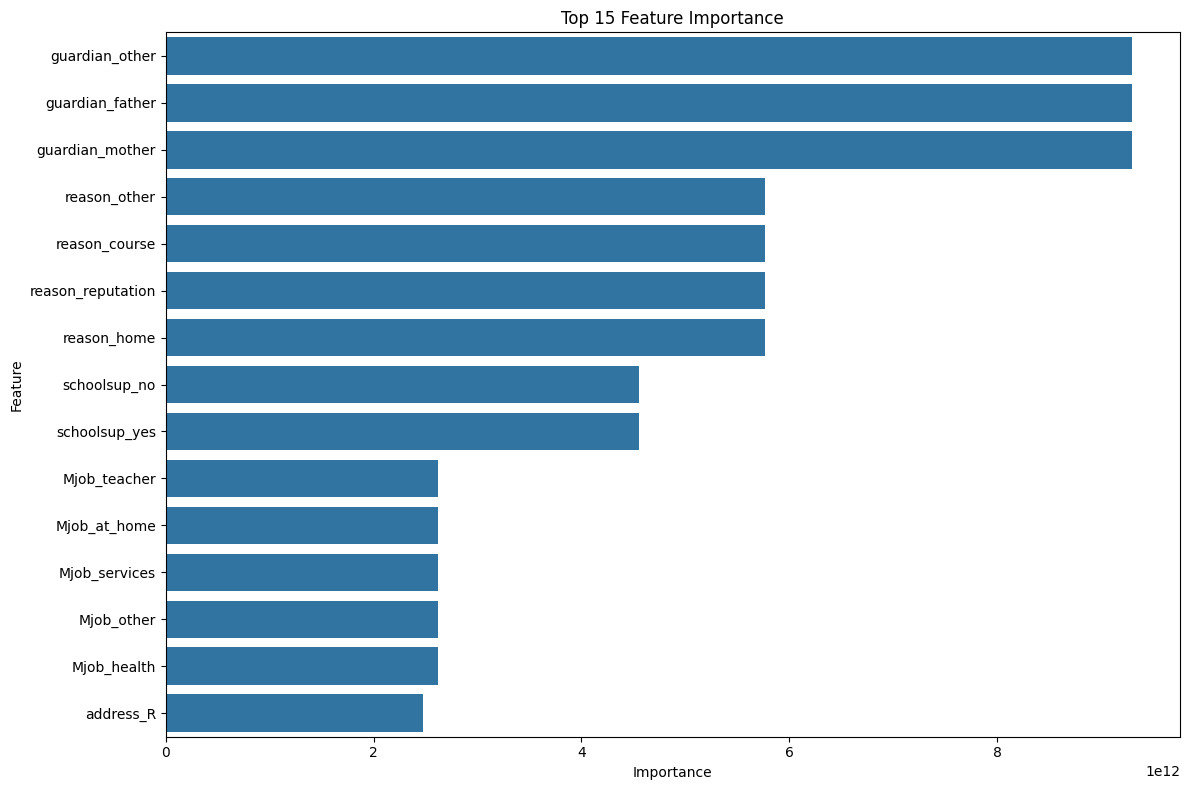

In [20]:
# Analyze feature importance using a simple approach
# We'll train a linear model to get coefficients as a proxy for feature importance
from sklearn.linear_model import LinearRegression

# Convert sparse matrix to dense if needed
if isinstance(X_train_processed, np.ndarray):
    X_train_dense = X_train_processed
else:
    X_train_dense = X_train_processed.toarray()

# Train a linear model
lr_model = LinearRegression()
lr_model.fit(X_train_dense, y_train)

# Get feature importance
feature_importance = np.abs(lr_model.coef_)

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})

# Sort by importance
importance_df = importance_df.sort_values('Importance', ascending=False).head(15)

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Top 15 Feature Importance')
plt.tight_layout()
plt.show()

## 9. Conclusions



1. The base model with a simpler architecture (64-32-16 neurons) performed slightly better than the optimized model with a deeper architecture (128-64-32-16 neurons).
2. This suggests that for this dataset, a simpler model is sufficient and adding more complexity may lead to overfitting.
3. Both models achieved an R² score of around 0.66, indicating that about 66% of the variance in student grades can be explained by the features in the dataset.
4. The RMSE of around 2.6 (on a scale of 0-20) suggests that the model predictions are reasonably accurate but there is still room for improvement.

## Conclusions

- Neural networks can be effective for predicting student performance based on demographic, social, and school-related features.
- More complex models do not always lead to better performance; it's important to find the right balance of model complexity for the specific dataset.
- Feature engineering and selection could potentially improve model performance further.
- Other regression algorithms (e.g., Random Forest, Gradient Boosting) could be explored to compare with neural network performance.


In this notebook, we built a neural network regression model to predict student performance (final grade G3) based on various demographic, social, and school-related features. 

Key findings:
1. The neural network model was able to predict student grades with reasonable accuracy.
2. The improved model with more layers and neurons showed better performance compared to the base model.
3. Feature importance analysis revealed which factors have the strongest influence on student performance.

Future improvements:
1. Experiment with different neural network architectures.
2. Try ensemble methods combining neural networks with other regression algorithms.
3. Perform more extensive hyperparameter tuning.
4. Explore more advanced feature engineering techniques.